In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt

In [2]:
%matplotlib inline

In [3]:
df1 = pd.read_csv('311_Service_Requests_from_2010_to_Present.csv')

G:\anaconda\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [151]:
df1.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Request_closing_time,Request_closing_time group
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",00:55:15,1
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",01:26:16,1
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",04:51:31,5
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",07:45:14,8
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",03:27:02,3


Text(0.5, 1.0, 'Most frequent complaints')

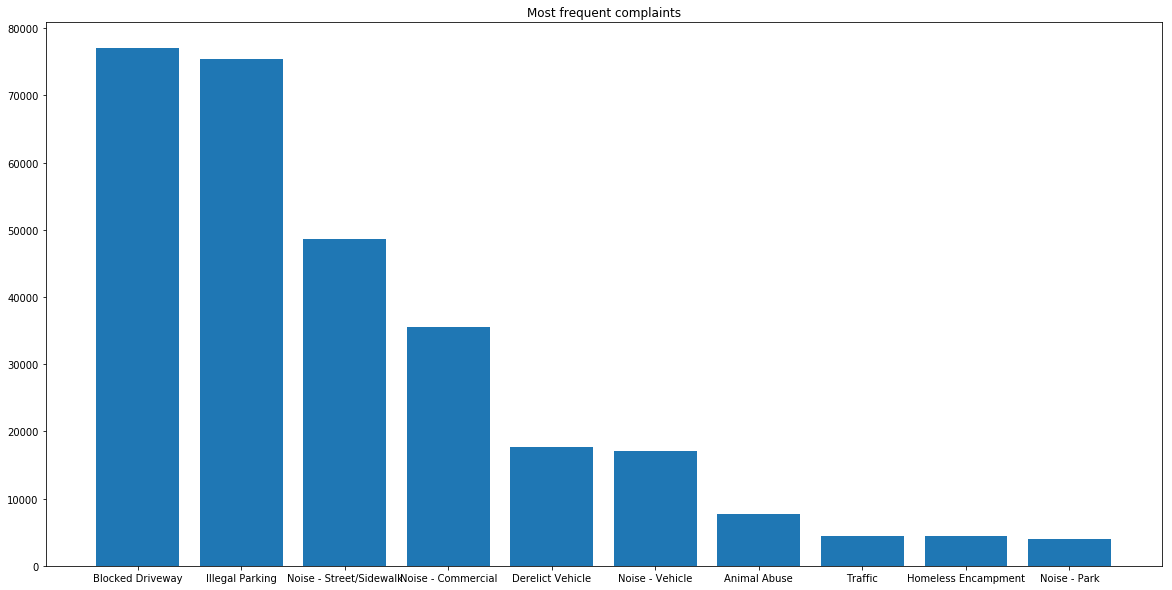

In [4]:
plt.figure(figsize=(20,10))
x=df1['Complaint Type'].value_counts().head(10).index
y=df1['Complaint Type'].value_counts().head(10).array
plt.bar(x,y)
plt.title('Most frequent complaints')

Text(0.5, 1.0, 'Least frequent complaints')

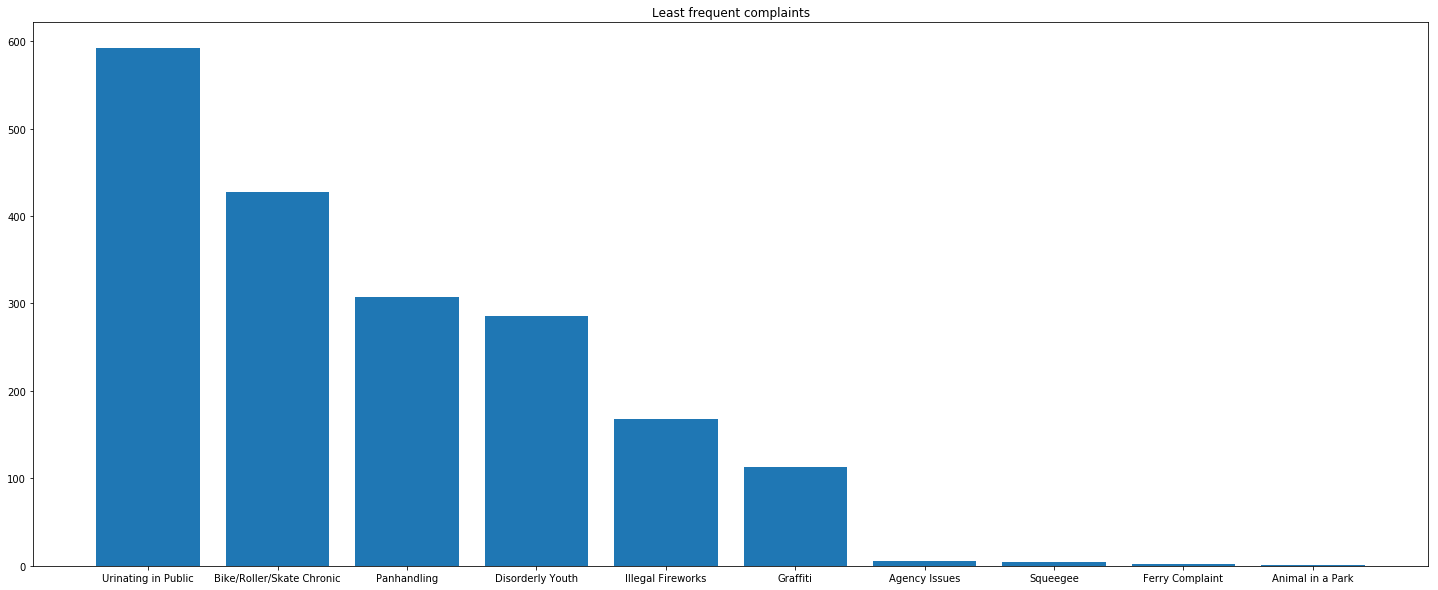

In [5]:
plt.figure(figsize=(25,10))
x=df1['Complaint Type'].value_counts().tail(10).index
y=df1['Complaint Type'].value_counts().tail(10).array
plt.bar(x,y)
plt.title('Least frequent complaints')


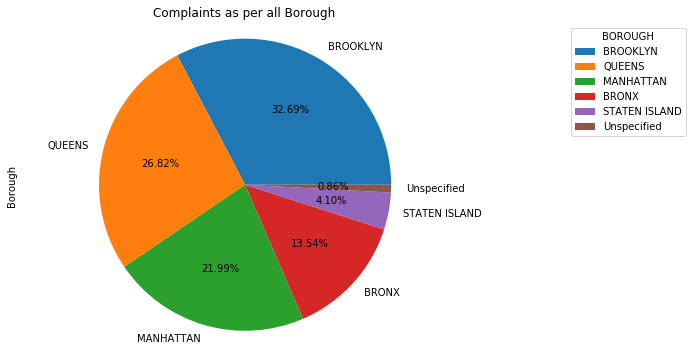

In [6]:
df1['Borough'].value_counts().plot(kind='pie',autopct='%2.2f%%',figsize = (8,6))
plt.legend(title='BOROUGH', loc='upper right', bbox_to_anchor=(1.5,1))
plt.axis('equal')
plt.title('Complaints as per all Borough')
plt.show()


In [7]:
df1['Created Date'] = pd.to_datetime(df1['Created Date'])

In [8]:
df1['Closed Date'] = pd.to_datetime(df1['Closed Date'])

In [9]:
df1['Request_closing_time']=df1['Closed Date'] -  df1['Created Date']

In [10]:
# funtion to change difference of Closed time and created time into hours...dividig all seconds by 3600
def changetime(timedelta):
    if str(timedelta).lower()=='nat':
        return 'blank'
    else:
        return round((timedelta.total_seconds())/3600)

In [11]:
df1['Request_closing_time group'] = df1['Request_closing_time'].apply(changetime)

In [12]:
# removing all rows with NaT in 'request_closing_time' col.

df1.dropna(subset=['Request_closing_time'],axis=0,inplace=True)

In [13]:
df1['Request_closing_time group'] = pd.to_numeric(df1['Request_closing_time group'])

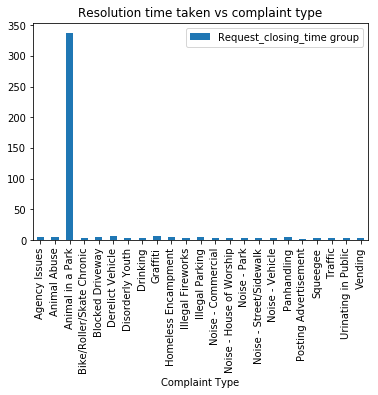

In [14]:
df1.groupby('Complaint Type').mean()[['Request_closing_time group']].plot(kind='bar',title='Resolution time taken vs complaint type')

These is one outlier for "Animal in Park". Will remove it from dataset.

In [15]:
df1.drop(df1[df1['Complaint Type']=='Animal in a Park'].index,inplace=True)

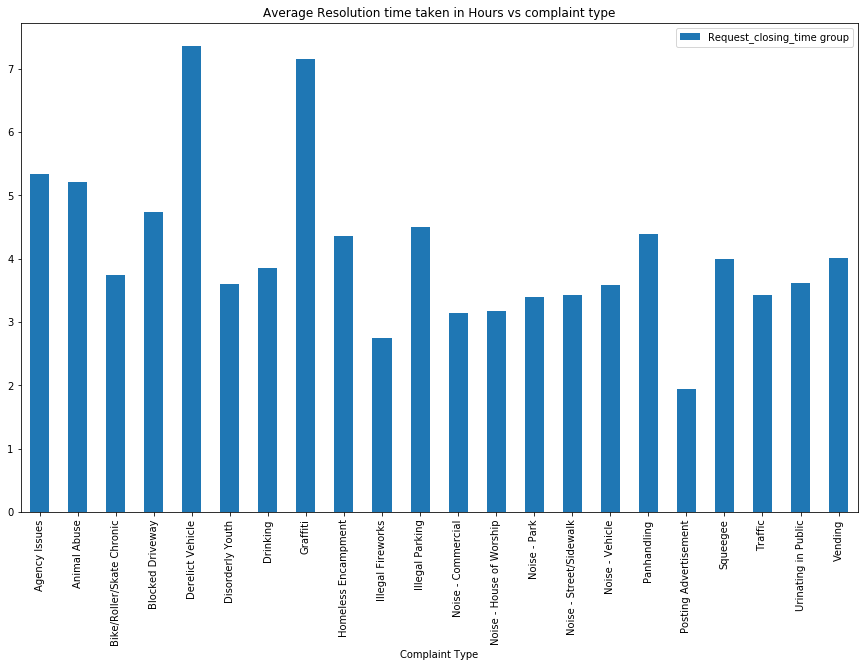

In [16]:
df1.groupby('Complaint Type').mean()[['Request_closing_time group']].plot(kind='bar',figsize=(15,9),title='Average Resolution time taken in Hours vs complaint type',)

In [17]:
df1.groupby('Complaint Type').mean()['Request_closing_time group']

Complaint Type
Agency Issues                5.333333
Animal Abuse                 5.216143
Bike/Roller/Skate Chronic    3.740566
Blocked Driveway             4.741648
Derelict Vehicle             7.355242
Disorderly Youth             3.594406
Drinking                     3.858824
Graffiti                     7.150442
Homeless Encampment          4.365263
Illegal Fireworks            2.750000
Illegal Parking              4.497196
Noise - Commercial           3.138366
Noise - House of Worship     3.170075
Noise - Park                 3.398807
Noise - Street/Sidewalk      3.433543
Noise - Vehicle              3.580814
Panhandling                  4.396721
Posting Advertisement        1.949074
Squeegee                     4.000000
Traffic                      3.430605
Urinating in Public          3.618243
Vending                      4.007642
Name: Request_closing_time group, dtype: float64

In [18]:
df1[df1['Complaint Type']=='Noise - Street/Sidewalk']['Request_closing_time group'].mean()

3.433542724020301

In [19]:
df1.sort_values('Request_closing_time group',ascending=False)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Request_closing_time,Request_closing_time group
244488,30684975,2015-05-23 23:51:59,2015-06-17 16:44:21,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,11238.0,NaN,...,NaN,NaN,NaN,NaN,NaN,40.685950,-73.959422,"(40.68594971751218, -73.95942153955151)",24 days 16:52:22,593
23664,32154771,2015-12-07 18:32:00,2015-12-31 19:53:36,NYPD,New York City Police Department,Illegal Parking,Double Parked Blocking Traffic,Street/Sidewalk,11214.0,30 BAY 37 STREET,...,NaN,NaN,NaN,NaN,NaN,40.598145,-73.989352,"(40.59814521498835, -73.98935198928409)",24 days 01:21:36,577
21268,32167187,2015-12-10 08:25:00,2015-12-31 23:41:01,NYPD,New York City Police Department,Animal Abuse,Other (complaint details),Street/Sidewalk,11219.0,928 40 STREET,...,NaN,NaN,NaN,NaN,NaN,40.644966,-73.994998,"(40.6449662497121, -73.99499837340035)",21 days 15:16:01,519
12167,32226107,2015-12-18 13:03:23,2015-12-27 20:24:29,NYPD,New York City Police Department,Derelict Vehicle,With License Plate,Street/Sidewalk,11226.0,2220 BEVERLY ROAD,...,NaN,NaN,NaN,NaN,NaN,40.644664,-73.956358,"(40.64466438582295, -73.95635848114169)",9 days 07:21:06,223
12168,32225355,2015-12-18 12:59:07,2015-12-27 20:21:19,NYPD,New York City Police Department,Derelict Vehicle,With License Plate,Street/Sidewalk,11226.0,NaN,...,NaN,NaN,NaN,NaN,NaN,40.644967,-73.958978,"(40.64496727639598, -73.95897801142875)",9 days 07:22:12,223
11254,32235864,2015-12-19 11:41:09,2015-12-27 20:20:15,NYPD,New York City Police Department,Derelict Vehicle,With License Plate,Street/Sidewalk,11226.0,NaN,...,NaN,NaN,NaN,NaN,NaN,40.644656,-73.956632,"(40.64465625507198, -73.95663234950166)",8 days 08:39:06,201
11251,32234912,2015-12-19 11:44:30,2015-12-27 20:18:09,NYPD,New York City Police Department,Derelict Vehicle,With License Plate,Street/Sidewalk,11226.0,NaN,...,NaN,NaN,NaN,NaN,NaN,40.644656,-73.956632,"(40.64465625507198, -73.95663234950166)",8 days 08:33:39,201
11110,32238859,2015-12-19 15:59:54,2015-12-27 16:36:02,NYPD,New York City Police Department,Derelict Vehicle,With License Plate,Vacant Lot,11226.0,45 LENOX ROAD,...,NaN,NaN,NaN,NaN,NaN,40.653676,-73.957928,"(40.65367609466097, -73.95792751148433)",8 days 00:36:08,193
40690,32034228,2015-11-20 13:35:40,2015-11-27 14:42:28,NYPD,New York City Police Department,Derelict Vehicle,With License Plate,Street/Sidewalk,11422.0,121-55 235 STREET,...,NaN,NaN,NaN,NaN,NaN,40.683493,-73.730913,"(40.68349308751147, -73.73091308242111)",7 days 01:06:48,169
40647,32029057,2015-11-20 14:33:07,2015-11-27 10:35:44,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11413.0,NaN,...,NaN,NaN,NaN,NaN,NaN,40.666404,-73.745368,"(40.66640400481538, -73.74536818797739)",6 days 20:02:37,164


# Statistical test

Anova Test to check the average response time across the complaint are similar or not.

Assumptions 
1) Normally distributed poulation
2) Independent Samples
3) Equal std deviations


H0 = all means are same for different complaint types
Ha = means are not same 

In [149]:
import scipy.stats as stats

In [61]:

df1['Complaint Type'].unique()

array(['Noise - Street/Sidewalk', 'Blocked Driveway', 'Illegal Parking',
       'Derelict Vehicle', 'Noise - Commercial',
       'Noise - House of Worship', 'Posting Advertisement',
       'Noise - Vehicle', 'Animal Abuse', 'Vending', 'Traffic',
       'Drinking', 'Bike/Roller/Skate Chronic', 'Panhandling',
       'Noise - Park', 'Homeless Encampment', 'Urinating in Public',
       'Graffiti', 'Disorderly Youth', 'Illegal Fireworks',
       'Agency Issues', 'Squeegee'], dtype=object)

In [148]:
Noise_Street_Sidewalk = df1[df1['Complaint Type']=='Noise - Street/Sidewalk']['Request_closing_time group'].values
Blocked_Driveway = df1[df1['Complaint Type']=='Blocked Driveway']['Request_closing_time group'].values
Illegal_Parking = df1[df1['Complaint Type']=='Illegal Parking']['Request_closing_time group'].values
Noise_House_of_Worship = df1[df1['Complaint Type']=='Noise - House of Worship']['Request_closing_time group'].values
Noise_Commercial = df1[df1['Complaint Type']=='Noise - Commercial']['Request_closing_time group'].values
Noise_House_of_Worship = df1[df1['Complaint Type']=='Noise - House of Worship']['Request_closing_time group'].values
Posting_Advertisement = df1[df1['Complaint Type']=='Posting Advertisement']['Request_closing_time group'].values
Noise_Vehicle = df1[df1['Complaint Type']=='Noise - Vehicle']['Request_closing_time group'].values
Animal_Abuse = df1[df1['Complaint Type']=='Animal Abuse']['Request_closing_time group'].values
Vending = df1[df1['Complaint Type']=='Vending']['Request_closing_time group'].values
Traffic = df1[df1['Complaint Type']=='Traffic']['Request_closing_time group'].values
Drinking = df1[df1['Complaint Type']=='Drinking']['Request_closing_time group'].values
Bike_Roller_SkateChronic = df1[df1['Complaint Type']=='Bike/Roller/Skate Chronic']['Request_closing_time group'].values
Panhandling = df1[df1['Complaint Type']=='Panhandling']['Request_closing_time group'].values
Noise_Park = df1[df1['Complaint Type']=='Noise - Park']['Request_closing_time group'].values
Homeless_Encampment = df1[df1['Complaint Type']=='Homeless Encampment']['Request_closing_time group'].values
Urinating_in_Public = df1[df1['Complaint Type']=='Urinating in Public']['Request_closing_time group'].values
Graffiti = df1[df1['Complaint Type']=='Graffiti']['Request_closing_time group'].values
Disorderly_Youth = df1[df1['Complaint Type']=='Disorderly Youth']['Request_closing_time group'].values
Illegal_Fireworks = df1[df1['Complaint Type']=='Illegal Fireworks']['Request_closing_time group'].values
Agency_Issues = df1[df1['Complaint Type']=='Agency Issues']['Request_closing_time group'].values
Squeegee = df1[df1['Complaint Type']=='Squeegee']['Request_closing_time group'].values

In [150]:
stats.f_oneway(Noise_Street_Sidewalk, Blocked_Driveway, Illegal_Parking, Noise_House_of_Worship, Noise_Commercial,
               Noise_House_of_Worship,Posting_Advertisement,Noise_Vehicle,Animal_Abuse,Vending,Traffic,Drinking,
               Bike_Roller_SkateChronic,Panhandling,Noise_Park,Homeless_Encampment,Urinating_in_Public,Graffiti,Disorderly_Youth
               ,Illegal_Fireworks,Agency_Issues,Squeegee)

F_onewayResult(statistic=191.70524401561138, pvalue=0.0)

p value is very small , very less compare to significance value. so hypothesis can be rejected. hence it cane be concluded that all means are not same for diffrent comlpaint types.

# Statistical test 

Chi Square test ( to check data relation between two categorical data)

Null Hypothesis =  both categorical data is independent
Alternative hypothesis = both categorical data is dependent( related)

As researcher we have taken alpha as .05 (5%)



In [45]:
Location = df1['Location']
ComplaintType = df1['Complaint Type']

In [46]:
table = pd.crosstab(Location,ComplaintType)
table

Complaint Type,Animal Abuse,Bike/Roller/Skate Chronic,Blocked Driveway,Derelict Vehicle,Disorderly Youth,Drinking,Graffiti,Homeless Encampment,Illegal Fireworks,Illegal Parking,...,Noise - House of Worship,Noise - Park,Noise - Street/Sidewalk,Noise - Vehicle,Panhandling,Posting Advertisement,Squeegee,Traffic,Urinating in Public,Vending
Location,,,,,,,,,,,,,,,,,,,,,
"(40.49913462101514, -74.24348482977875)",0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
"(40.49967332981336, -74.2379063249761)",0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"(40.49994886080869, -74.23740031497493)",0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
"(40.49999700116009, -74.23801175120917)",0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
"(40.50002168207532, -74.23802262609722)",0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
"(40.50004910779944, -74.238033510764)",2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"(40.500053572554975, -74.23720292425104)",0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
"(40.50062125381004, -74.24398645134252)",1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"(40.501254659258244, -74.2403930159996)",0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [47]:
from scipy.stats import chi2_contingency

In [48]:
chi2, p, dof, expected = chi2_contingency(table.values)

In [56]:
print ( "chi-squred statistic is %0.3f and p-value is %0.3f " %(chi2,p))

chi-squred statistic is 4160841.631 and p-value is 0.000 


In this Chi-square test between Location and complaint type ( Two categorical data) , P value comes as very low almost equal to zero.. 
P ~ 0
Null hypothesis can be rejected and can be concluded that both datasets are related.